In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import ParentImport

from sklearn.decomposition import PCA
from Extractor import Extractor

In [2]:
filename = 'dem-comments-220424-1305.csv'
extractor = Extractor(filename=filename, load_dir='../datasets')
good_embed = extractor.word_embedding('good')
evil_embed = extractor.word_embedding('evil')
print(good_embed)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


['[CLS]', 'good', '[SEP]']
['[CLS]', 'evil', '[SEP]']
[ 1.12393275e-01  7.50539005e-01 -2.81923234e-01 -4.90469933e-01
  7.95559434e-04 -6.08553402e-02 -5.20598769e-01  7.44879961e-01
 -3.60411167e-01 -5.04359543e-01 -8.33485007e-01 -1.63152263e-01
  1.02652001e+00  1.76984161e-01  2.29895934e-01  1.01256263e+00
  3.04860473e-01 -3.51493061e-01 -1.13187544e-01  1.49254173e-01
 -3.46391618e-01 -1.66975595e-02 -1.19958377e+00  5.59282839e-01
  3.93314093e-01  7.68860206e-02  7.06651330e-01 -2.22774804e-01
 -8.99170280e-01  2.27765173e-01  9.49596822e-01  3.46401572e-01
 -5.41802168e-01 -2.01034218e-01 -9.78039861e-01 -5.70098817e-01
  9.87111509e-01  3.02296072e-01 -1.03795516e+00  9.15496647e-01
  5.04775345e-01 -1.02322388e+00  6.02118611e-01  4.27255422e-01
 -4.47247326e-02  9.39696550e-01  2.54051417e-01  1.07270554e-01
 -8.31705928e-01 -1.49887037e+00 -3.02261412e-01 -5.20374835e-01
 -1.72097266e-01  2.56100774e-01  9.07330215e-03 -1.79337174e-01
 -4.00859863e-01 -4.91713792e-01 -4.

dict_keys(['filepath', 'embeddings', 'comment_ids', 'target_word', 'stamp'])
target word republican
filepath datasets/dem-comments-220424-1305.csv
num_embeddings 914 <class 'list'>
PCA done! Time elapsed: 0.0020737648010253906 seconds


Text(7.4472482682346355, 0.05000000000000118, 'evil')

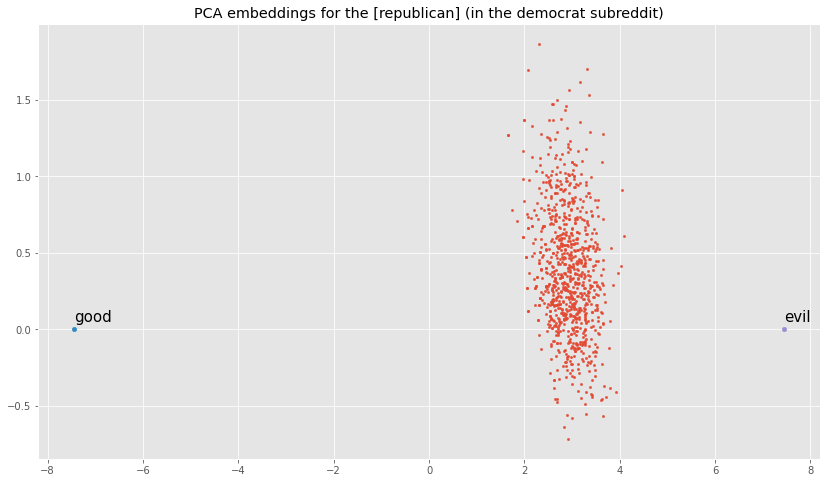

In [21]:
data = np.load('../extractions/d-republican.npy', allow_pickle=True)[()]
print(data.keys())
print('target word', data['target_word'])
print('filepath', data['filepath'])
print('num_embeddings', len(data['embeddings']), type(data['embeddings']))

embeddings = data['embeddings']
time_start = time.time()

pca = PCA(n_components=2)
pca.fit([good_embed, evil_embed])
good_pca = pca.transform([good_embed])
evil_pca = pca.transform([evil_embed])

pca_result = pca.transform(embeddings)
x, y = pca_result[:, 0], pca_result[:, 1]

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))
plt.style.use('ggplot')
plt.figure(figsize=(14,8))
plt.title('PCA embeddings for the [republican] (in the democrat subreddit)')
plt.scatter(x, y, s=5)

plt.scatter(good_pca[0, 0], good_pca[0, 1], s=20)
plt.annotate('good', (good_pca[0, 0], good_pca[0, 1] + 0.05), fontsize=15)
plt.scatter(evil_pca[0, 0], evil_pca[0, 1], s=20)
plt.annotate('evil', (evil_pca[0, 0], evil_pca[0, 1] + 0.05), fontsize=15)


In [ ]:
data = np.load('../extractions/d-republican.npy', allow_pickle=True)[()]
print(data.keys())
print('target word', data['target_word'])
print('filepath', data['filepath'])
print('num_embeddings', len(data['embeddings']), type(data['embeddings']))

embeddings = data['embeddings']
time_start = time.time()

pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings)
x, y = pca_result[:, 0], pca_result[:, 1]

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))
plt.style.use('ggplot')
plt.figure(figsize=(14,8))
plt.title('PCA embeddings for the [republican] (in the democrat subreddit)')
plt.scatter(x, y, s=5)